In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Orange_Telecom_Churn_Data.csv')
df.sample(5)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
1877,NC,55,408,359-7562,yes,no,0,221.0,115,37.57,...,97,14.06,235.4,117,10.59,9.7,4,2.62,1,False
1593,KS,105,415,405-1108,yes,no,0,273.9,119,46.56,...,103,23.68,255.3,90,11.49,10.9,7,2.94,1,True
1468,OH,75,510,372-2296,no,yes,27,117.5,102,19.98,...,127,17.58,194.4,114,8.75,4.2,7,1.13,3,False
1552,SD,75,408,335-3681,no,no,0,147.5,110,25.08,...,97,16.29,135.0,68,6.08,16.4,3,4.43,2,False
1484,AR,107,415,343-5219,yes,no,0,133.3,106,22.66,...,89,15.55,241.1,123,10.85,12.9,2,3.48,3,True


In [3]:
list(df.columns)

['state',
 'account_length',
 'area_code',
 'phone_number',
 'intl_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churned']

### No. of users on voice mail plan = `1323`

In [4]:
df.voice_mail_plan.value_counts()  # we have only 2 possible values.

no     3677
yes    1323
Name: voice_mail_plan, dtype: int64

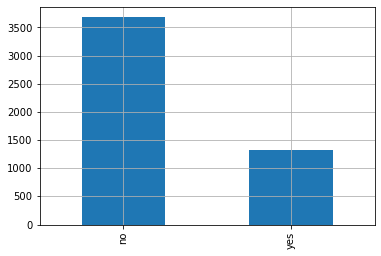

In [36]:
ax = df.voice_mail_plan.value_counts().plot(kind='bar', grid=True)
fig = ax.get_figure()
fig.savefig(r'C:\Users\kaban\Desktop\Ass_#4\figure.pdf')

### the average of vmail messages for subscribed users only = `29` vmess

In [5]:
list(df.columns)

['state',
 'account_length',
 'area_code',
 'phone_number',
 'intl_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churned']

In [6]:
round(df.query('voice_mail_plan == "yes"')['number_vmail_messages'].describe()['mean']) # rounded because the voice mail messages count is a discrete variable.

29

<AxesSubplot:>

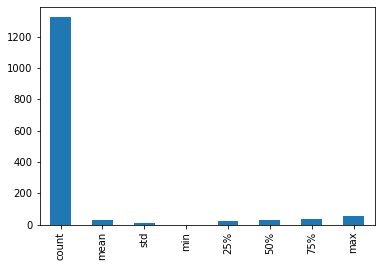

In [37]:
round(df.query('voice_mail_plan == "yes"')['number_vmail_messages'].describe()).plot(kind='bar') # rounded because the voice mail messages count is a discrete variable.

### total daylight minutes per state

In [7]:
df_total_day_min = df.groupby('state')['total_day_minutes'].sum()

In [58]:
df_total_day_min.describe()['max'], df_total_day_min.describe()['min']

(27968.999999999985, 8992.500000000002)

In [8]:
df_total_day_min

state
AK    13029.0
AL    23494.8
AR    16117.1
AZ    15704.7
CA     8992.5
CO    16935.5
CT    17382.1
DC    15173.3
DE    17253.1
FL    15872.7
GA    14648.1
HI    15239.0
IA    12073.4
ID    21696.0
IL    15201.3
IN    18443.0
KS    18996.0
KY    17936.9
LA    14236.8
MA    19044.5
MD    19479.5
ME    19147.9
MI    18207.1
MN    22829.1
MO    15767.5
MS    17476.3
MT    17623.7
NC    16435.6
ND    16076.2
NE    15219.1
NH    16875.6
NJ    21513.7
NM    15921.9
NV    16324.7
NY    20246.2
OH    21544.5
OK    16771.5
OR    20327.1
PA    14374.9
RI    17191.3
SC    15798.3
SD    15732.9
TN    15784.4
TX    21411.8
UT    21187.8
VA    21166.1
VT    18269.0
WA    17847.4
WI    18649.7
WV    27969.0
WY    20804.9
Name: total_day_minutes, dtype: float64

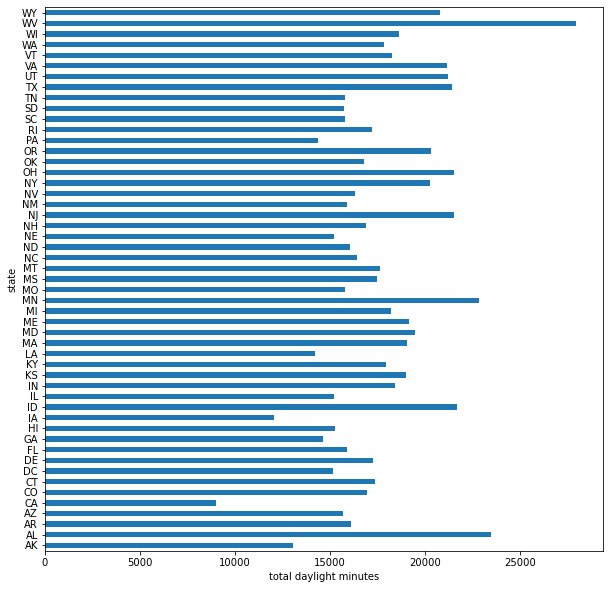

In [38]:
ax = df_total_day_min.plot(kind='barh', figsize=(10,10))
plt.xlabel('total daylight minutes')
plt.ylabel('state')
fig = ax.get_figure()
fig.savefig(r'C:\Users\kaban\Desktop\Ass_#4\fig3.png')

### total daylight charge per state

In [10]:
df_total_day_charge = df.groupby('state')['total_day_charge'].sum()

In [59]:
df_total_day_charge.describe()['max'], df_total_day_charge.describe()['min']

(4754.860000000001, 1528.7500000000005)

In [11]:
df_total_day_charge

state
AK    2214.96
AL    3994.15
AR    2739.95
AZ    2669.85
CA    1528.75
CO    2879.09
CT    2954.99
DC    2579.55
DE    2933.09
FL    2698.40
GA    2490.23
HI    2590.63
IA    2052.57
ID    3688.39
IL    2584.26
IN    3135.36
KS    3229.35
KY    3049.40
LA    2420.31
MA    3237.57
MD    3311.58
ME    3255.24
MI    3095.25
MN    3881.04
MO    2680.57
MS    2971.03
MT    2996.03
NC    2794.11
ND    2733.05
NE    2587.27
NH    2868.93
NJ    3657.36
NM    2706.74
NV    2775.24
NY    3441.92
OH    3662.64
OK    2851.17
OR    3455.71
PA    2443.76
RI    2922.59
SC    2685.79
SD    2674.62
TN    2683.39
TX    3640.06
UT    3601.98
VA    3598.29
VT    3105.82
WA    3034.09
WI    3170.47
WV    4754.86
WY    3536.89
Name: total_day_charge, dtype: float64

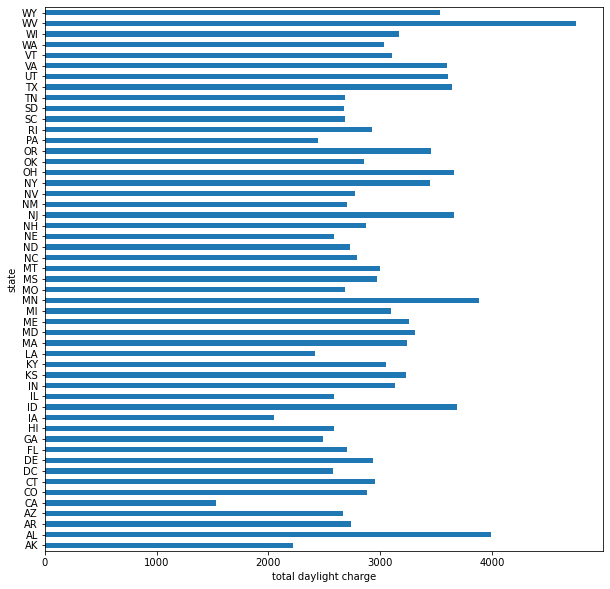

In [41]:
ax = df_total_day_charge.plot(kind='barh', figsize=(10,10))
plt.xlabel('total daylight charge')
plt.ylabel('state')
fig = ax.get_figure()
fig.savefig(r'C:\Users\kaban\Desktop\Ass_#4\fig4.png')

In [13]:
list(df.columns)

['state',
 'account_length',
 'area_code',
 'phone_number',
 'intl_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churned']

### average call duration (i.e. minutes consumed during calls) in day, eve and night  

#### average call duration for each period of time per `record (i.e. customer) `.

In [14]:
list(df.columns)

['state',
 'account_length',
 'area_code',
 'phone_number',
 'intl_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churned']

In [15]:
df.loc[:, ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes']].mean()  # column-wise.

total_day_minutes      180.28890
total_eve_minutes      200.63656
total_night_minutes    200.39162
dtype: float64

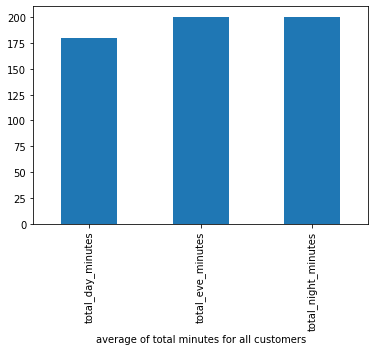

In [56]:
x_ticks = ['day', 'eve', 'night']
ax = df.loc[:, ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes']].mean().plot(kind='bar')
plt.xlabel('average of total minutes for all customers')
fig = ax.get_figure()
fig.savefig(r'C:\Users\kaban\Desktop\Ass_#4\fig.png')

In [16]:
df.total_day_minutes.sum()

901444.5

#### average call duration for each period of time per `record (i.e. customer) ` and the cusomer `to be within` the voice message plan. (i.e. analysis from another prespective.)

In [17]:
df.query('voice_mail_plan == "yes"').loc[:, ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes']].mean()

total_day_minutes      180.473923
total_eve_minutes      202.602343
total_night_minutes    200.856916
dtype: float64

<AxesSubplot:>

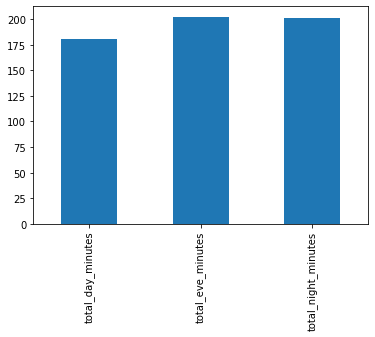

In [18]:
df.query('voice_mail_plan == "yes"').loc[:, ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes']].mean().plot(kind='bar')

#### average call duration for each period of time per `record (i.e. customer) ` and the cusomer `not to be within` the voice message plan.

In [19]:
df.query('voice_mail_plan == "no"').loc[:, ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes']].mean()

total_day_minutes      180.222328
total_eve_minutes      199.929263
total_night_minutes    200.224205
dtype: float64

<AxesSubplot:>

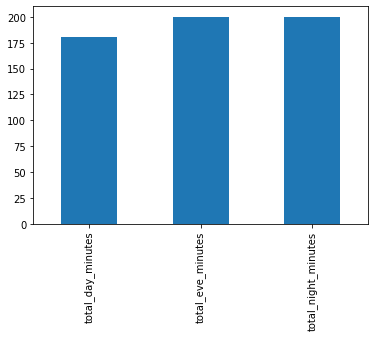

In [20]:
df.query('voice_mail_plan == "no"').loc[:, ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes']].mean().plot(kind='bar')

#### average call duration for each period of time per `state`.

In [21]:
df.groupby('state')[['total_day_minutes', 'total_eve_minutes', 'total_night_minutes']].mean()

,total_day_minutes,total_eve_minutes,total_night_minutes
state,,,
AK,180.958333,189.683333,197.870833
AL,189.474194,199.669355,187.160484
AR,175.185870,197.918478,205.045652
AZ,176.457303,195.919101,191.632584
CA,172.932692,194.632692,199.767308
CO,176.411458,204.292708,188.827083
CT,175.576768,201.148485,202.327273
DC,172.423864,197.865909,210.781818
DE,183.543617,206.446809,206.054255


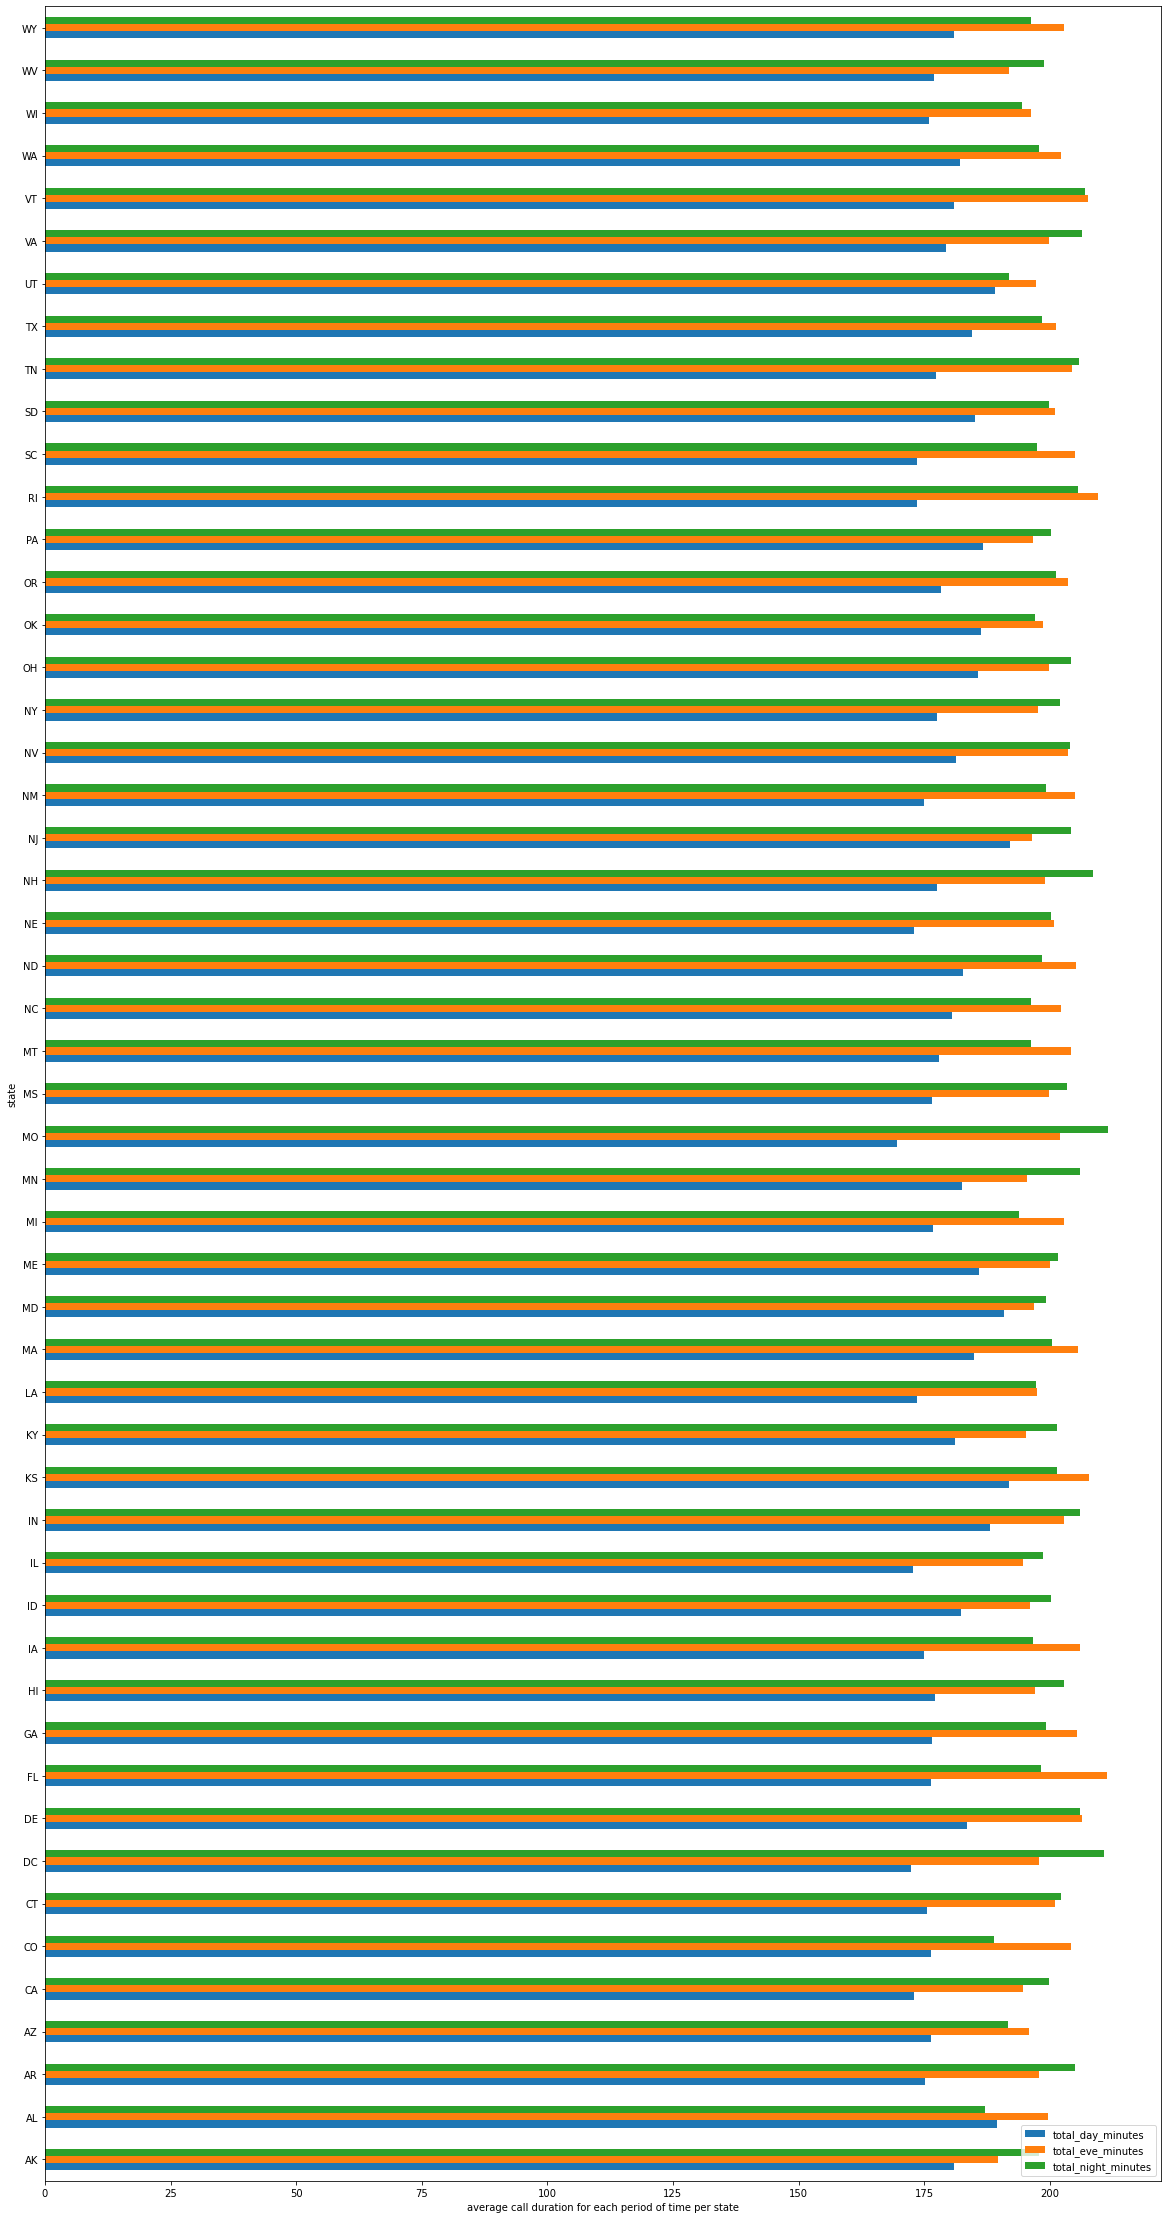

In [57]:
ax = df.groupby('state')[['total_day_minutes', 'total_eve_minutes', 'total_night_minutes']].mean().plot(kind='barh', figsize=(20, 40))
plt.xlabel('average call duration for each period of time per state')
plt.ylabel('state')
fig = ax.get_figure()
fig.savefig(r'C:\Users\kaban\Desktop\Ass_#4\fig7.png')

### total day minutes and charge (day, eve and night) for each customer(per record).

In [23]:
df['all_day_mins'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']

In [24]:
df['all_day_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

In [25]:
list(df.columns)

['state',
 'account_length',
 'area_code',
 'phone_number',
 'intl_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churned',
 'all_day_mins',
 'all_day_charge']

#### to visualize the distribution of these continous variable.

<AxesSubplot:ylabel='Frequency'>

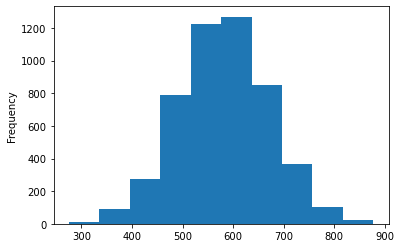

In [26]:
df.all_day_mins.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

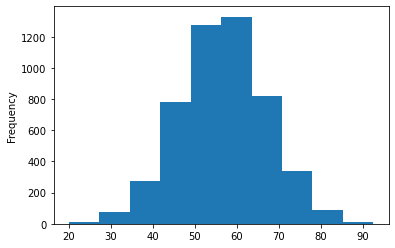

In [27]:
df.all_day_charge.plot(kind='hist')

In [28]:
### Symmetric data!